# Configuration

In [1]:
# Parameters
ENABLE_COLAB = False

PROJECT_NAME = 'ML1010-Group-Project'
EXPERIMENT_NAME = 'ReviewText_Lemma_Bert2_Full (XGB_Tune)'
FILE_NAME = '01_ML1010_GP_XGB_Bert2_Full_Tune'
LOAD_FROM_EXP = False

#Root Machine Learning Directory. Projects appear underneath
GOOGLE_DRIVE_MOUNT = '/content/gdrive' 
COLAB_ROOT_DIR = GOOGLE_DRIVE_MOUNT + '/MyDrive/Colab Notebooks'
COLAB_INIT_DIR = COLAB_ROOT_DIR + '/utility_files'

LOCAL_ROOT_DIR = '/home/magni//ML_Root/project_root'
LOCAL_INIT_DIR = LOCAL_ROOT_DIR + '/utility_files'

# Bootstrap Environment

In [2]:
#add in support for utility file directory and importing
import sys
import os

if ENABLE_COLAB:
  #Need access to drive
  from google.colab import drive
  drive.mount(GOOGLE_DRIVE_MOUNT, force_remount=True)
  
  #add in utility directory to syspath to import 
  INIT_DIR = COLAB_INIT_DIR
  sys.path.append(os.path.abspath(INIT_DIR))
  
  #Config environment variables
  ROOT_DIR = COLAB_ROOT_DIR
  
else:
  #add in utility directory to syspath to import
  INIT_DIR = LOCAL_INIT_DIR
  sys.path.append(os.path.abspath(INIT_DIR))
  
  #Config environment variables
  ROOT_DIR = LOCAL_ROOT_DIR

#Import Utility Support
from jarvis import Jarvis
jarvis = Jarvis(ROOT_DIR, PROJECT_NAME)

import mv_python_utils as mvutils

Wha...where am I?
I am awake now.

I have set your current working directory to /home/magni/ML_Root/project_root/ML1010-Group-Project
The current time is 14:35
Hello sir. Reminder, no more coffee.



# Setup Runtime Environment

In [3]:
if ENABLE_COLAB:
  #!pip install scipy -q
  #!pip install scikit-learn -q
  #!pip install pycaret -q
  #!pip install matplotlib -q
  #!pip install joblib -q
  #!pip install pandasql -q
  !pip install umap_learn -q
  !pip install sentence_transformers -q
  !pip install spacytextblob -q
  !pip install flair -q
  display('Google Colab enabled')
else:
  display('Google Colab not enabled')

#Common imports
import json
import pandas as pd
import numpy as np
import matplotlib
import re
import nltk
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split as tts
#from yellowbrick.classifier import ConfusionMatrix
#from sklearn.linear_model import LogisticRegression
from yellowbrick.target import ClassBalance
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

nltk.download('stopwords')
%matplotlib inline

'Google Colab not enabled'

[nltk_data] Downloading package stopwords to /home/magni/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
import importlib
import cw_df_metric_utils as cwutils
import DataPackage as dp
import DataPackageSupport as dps
import DataExperiment
import DataExperimentSupport

In [5]:
importlib.reload(dp)
importlib.reload(dps)
importlib.reload(DataExperiment)
importlib.reload(DataExperimentSupport)

<module 'DataExperimentSupport' from '/home/magni/ML_Root/project_root/utility_files/DataExperimentSupport.py'>

# Load Data

In [10]:
#axis_labels=[1,2,3,4,5]
axis_labels=[0,1]
#classifier = RandomForestClassifier()
#classifier = XGBClassifier(eval_metric='mlogloss')
classifier = XGBClassifier(silent=True, 
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=4, 
                      gamma=10,
                      eval_metric='mlogloss',
                      tree_method='gpu_hist')
ANALSYSIS_COL = 'reviewText_lemma_bert'
UNIQUE_COL = 'uuid'
TARGET_COL = 'overall_posneg'

In [11]:
if LOAD_FROM_EXP:
    #start from saved state
    myExp = jarvis.loadExperiment(FILE_NAME)
    myExp.display()

else:
    #start from source file and regenerate
    testDf = pd.read_pickle(jarvis.DATA_DIR_WORK + "/01_Cellphone_full.pkl.gz")

    testDfBert = cwutils.getBertEncodeFrame(df=testDf,
                                            bertColumn=ANALSYSIS_COL,
                                            uniqueColumn=UNIQUE_COL,
                                            otherColumns=[TARGET_COL]
                                            )



    myExp = DataExperiment.DataExperiment(projectName=PROJECT_NAME,
                                          experimentName=EXPERIMENT_NAME,
                                          origData=testDfBert,
                                          uniqueColumn=UNIQUE_COL,
                                          targetColumn=TARGET_COL,
                                          classifier=classifier)

DataExperiment summary:
---> projectName: ML1010-Group-Project
---> experimentName: ReviewText_Lemma_Bert2_Full (XGB_Tune)
---> isDataPackageLoaded: True
---> isBaseModelLoaded: False
---> isBaseModelPredicted: False
---> isBaseModelLearningCurveCreated: False
---> isFinalModelLoaded: False
---> isFinalModelPredicted: False
---> isFinalModelLearningCurveCreated: False
---> isClassifierLoaded: True
XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=0.4,
              enable_categorical=False, eval_metric='mlogloss', gamma=10,
              gpu_id=None, importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_delta_step=None, max_depth=4,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=0.3, reg_lambda=None,
              scale_po

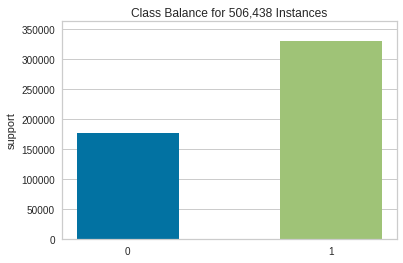

Undersampling data to match min class: 0 of size: 176948


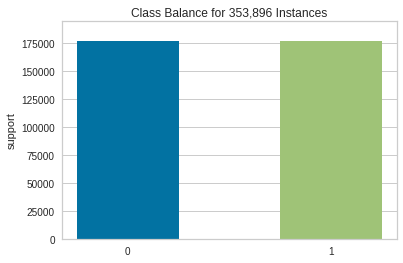

,overall_posneg,ttlCol
0,0,176948
1,1,176948


Completed train/test split (train_size = 0.8):
---> Original data size: 353896
---> Training data size: 283116
---> Testing data size: 70780
---> Stratified on column: overall_posneg


In [12]:
myExp.dataPackage.classBalanceUndersample()
myExp.dataPackage.splitTrainTest()

In [13]:
%%time
myExp.createBaseModel()

/home/magni/python_env/ML1010_env2/lib64/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:41:01] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Base Model Stats:
Accuracy: 0.82
Precision: 0.82
Recalll: 0.82
F1 Score: 0.82
Cohen kappa:: 0.64
CPU times: user 1min 19s, sys: 726 ms, total: 1min 20s
Wall time: 1min 15s


  0%|          | 0/101 [00:00<?, ?it/s]

Feature Importance Summary:
---> Original feature count: 768
---> Returned feature count: 212
---> Removed feature count: 556
---> Return items above (including): 0.001


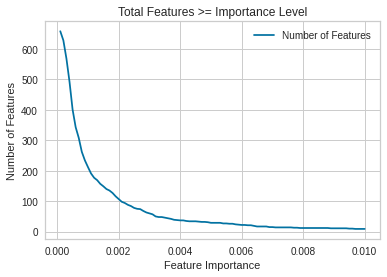

In [14]:
impDf = myExp.analyzeBaseModelFeatureImportance(returnAbove=0.0010)

In [15]:
%%time
myExp.createFinalModel(featureImportanceThreshold=0.0010)

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

/home/magni/python_env/ML1010_env2/lib64/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:42:59] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Final Model Stats:
Accuracy: 0.82
Precision: 0.82
Recalll: 0.82
F1 Score: 0.82
Cohen kappa:: 0.64
CPU times: user 24.7 s, sys: 209 ms, total: 25 s
Wall time: 22.9 s


In [16]:
%%time
myExp.createBaseModelLearningCurve()

[learning_curve] Training set sizes: [ 22649  45298 113246 226492]
[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/magni/python_env/ML1010_env2/lib64/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:43:41] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] ................ , score=(train=0.859, test=0.815), total=  13.8s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.8s remaining:    0.0s


[14:43:55] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] ................ , score=(train=0.842, test=0.816), total=  19.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   33.3s remaining:    0.0s


[14:44:14] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] ................ , score=(train=0.829, test=0.818), total=  35.5s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.1min remaining:    0.0s


[14:44:50] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] ................ , score=(train=0.823, test=0.817), total= 1.0min
[CV]  ................................................................
[14:45:53] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] ................ , score=(train=0.858, test=0.818), total=  13.9s
[CV]  ................................................................
[1

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 11.0min finished


In [17]:
%%time
myExp.createFinalModelLearningCurve()

[learning_curve] Training set sizes: [ 22649  45298 113246 226492]
[CV]  ................................................................
[14:54:42] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/magni/python_env/ML1010_env2/lib64/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] ................ , score=(train=0.849, test=0.814), total=   4.5s
[CV]  ................................................................
[14:54:46] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.5s remaining:    0.0s


[CV] ................ , score=(train=0.836, test=0.815), total=   6.2s
[CV]  ................................................................
[14:54:53] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.8s remaining:    0.0s


[CV] ................ , score=(train=0.825, test=0.816), total=  11.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   22.1s remaining:    0.0s


[14:55:04] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] ................ , score=(train=0.820, test=0.815), total=  19.1s
[CV]  ................................................................
[14:55:23] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] ................ , score=(train=0.848, test=0.815), total=   4.5s
[CV]  ................................................................
[1

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  3.4min finished


Base Model Stats:
Accuracy: 0.82
Precision: 0.82
Recalll: 0.82
F1 Score: 0.82
Cohen kappa:: 0.64
              precision    recall  f1-score   support

           0       0.82      0.82      0.82     35390
           1       0.82      0.82      0.82     35390

    accuracy                           0.82     70780
   macro avg       0.82      0.82      0.82     70780
weighted avg       0.82      0.82      0.82     70780



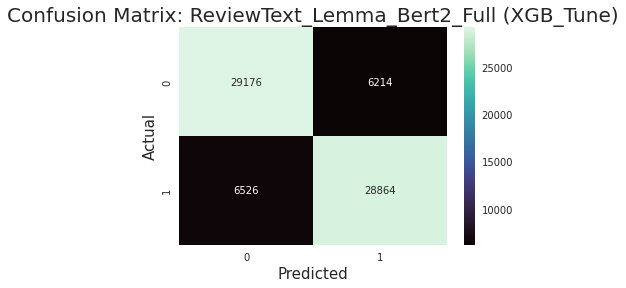

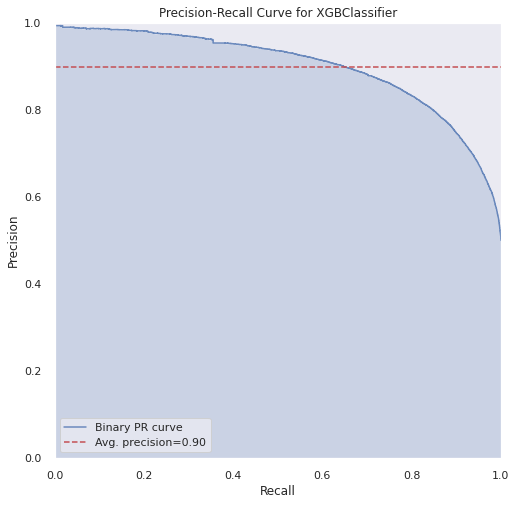

<Figure size 576x576 with 0 Axes>

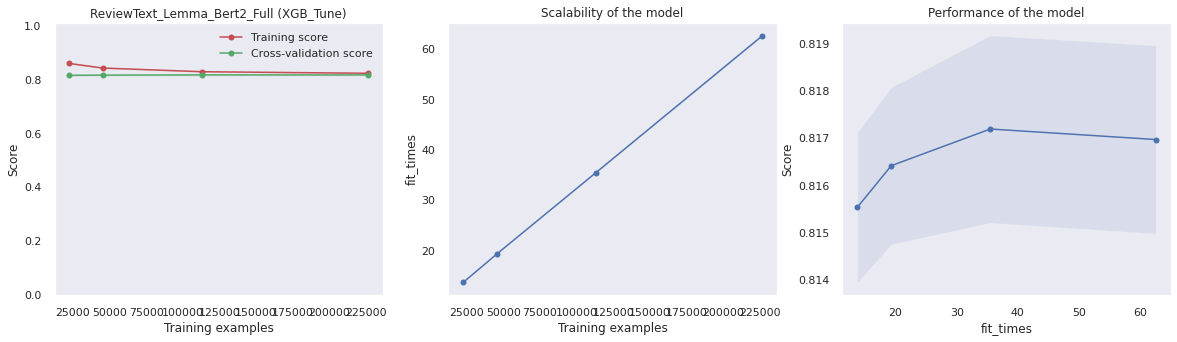

Base model ROCAUC not calculated. Starting now


/home/magni/python_env/ML1010_env2/lib64/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:05:19] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




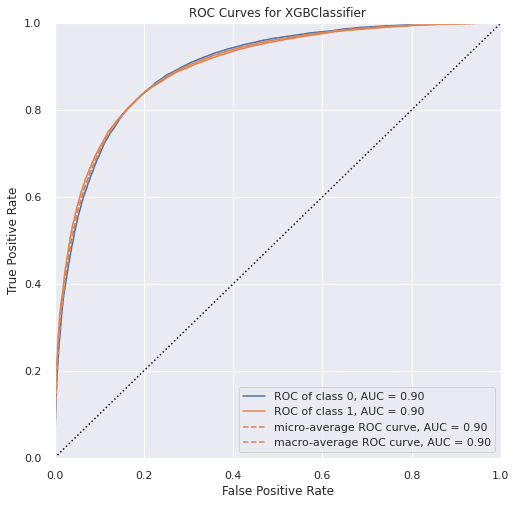

  0%|          | 0/251 [00:00<?, ?it/s]

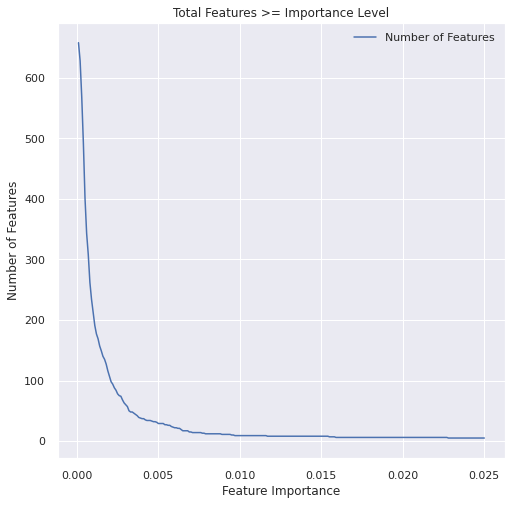

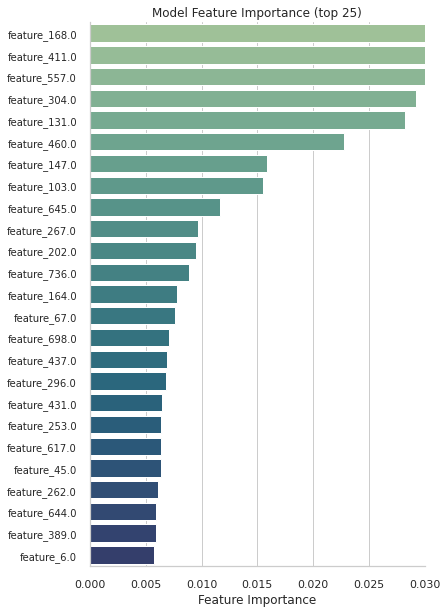

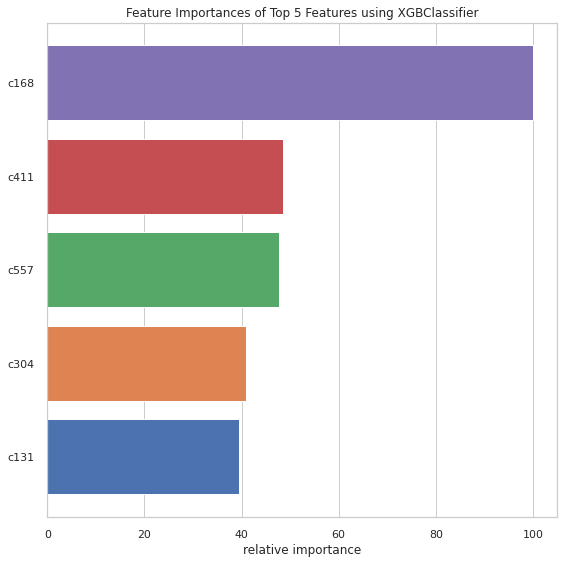

/home/magni/python_env/ML1010_env2/lib64/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


<Figure size 576x576 with 0 Axes>

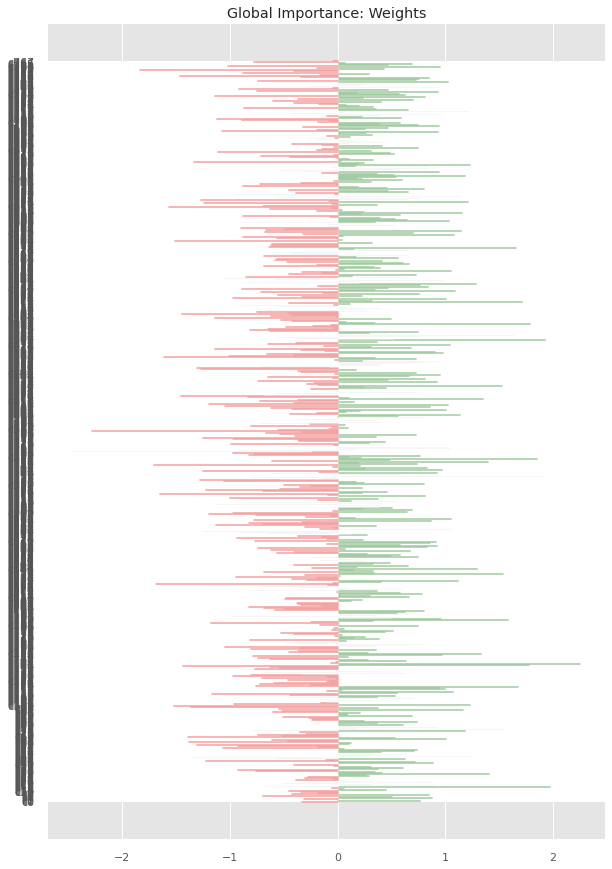

/home/magni/python_env/ML1010_env2/lib64/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


predicted [1]
actual 0


In [ ]:
myExp.showBaseModelReport(axis_labels,
                          upperValue=0.025)

Final Model Stats:
Accuracy: 0.82
Precision: 0.82
Recalll: 0.82
F1 Score: 0.82
Cohen kappa:: 0.64
              precision    recall  f1-score   support

           0       0.82      0.82      0.82     35390
           1       0.82      0.81      0.82     35390

    accuracy                           0.82     70780
   macro avg       0.82      0.82      0.82     70780
weighted avg       0.82      0.82      0.82     70780



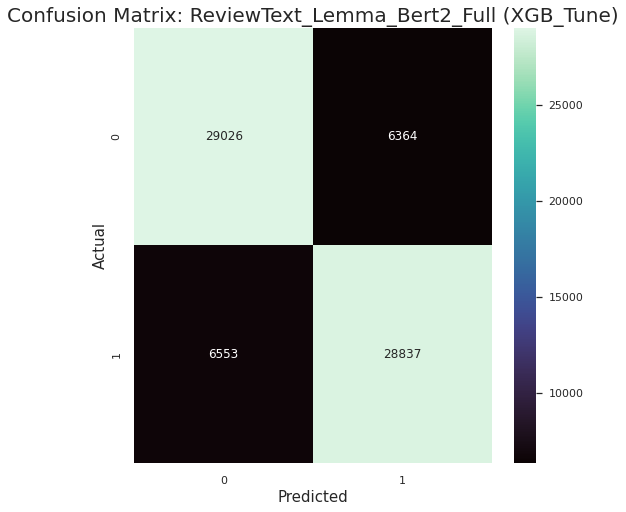

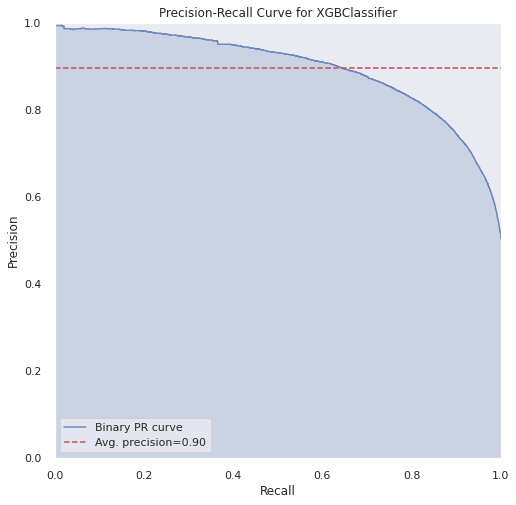

<Figure size 576x576 with 0 Axes>

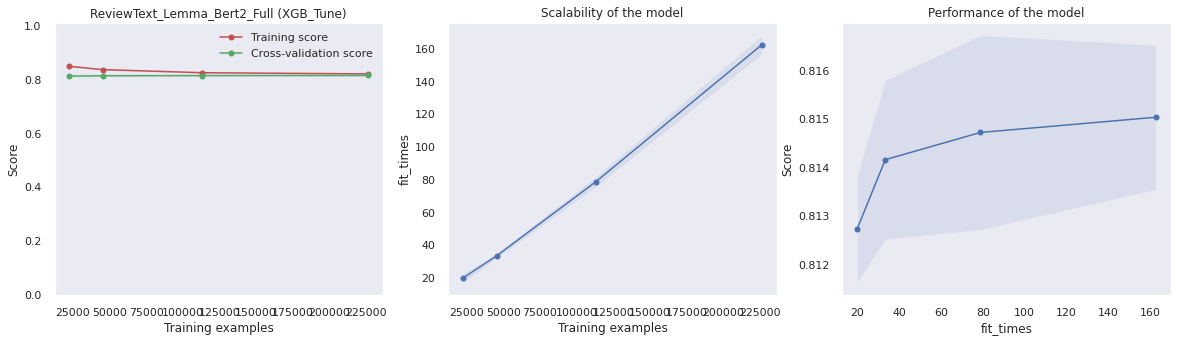

Final model ROCAUC not calculated. Starting now


/home/magni/python_env/ML1010_env2/lib64/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:59:01] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




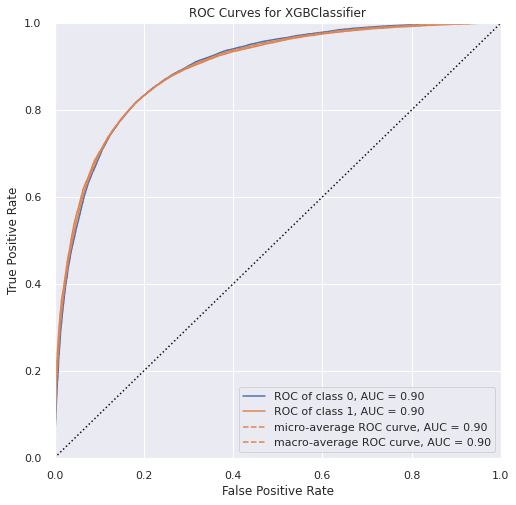

  0%|          | 0/12 [00:00<?, ?it/s]

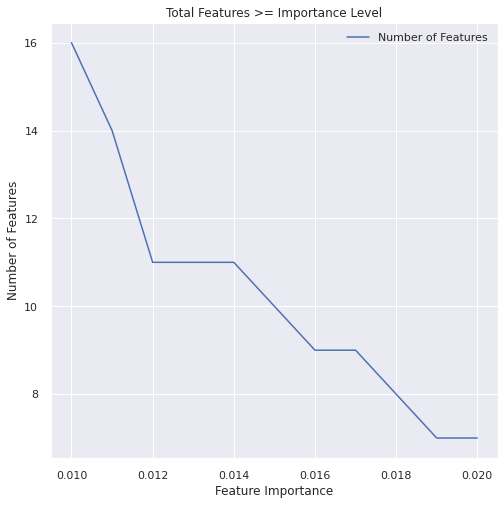

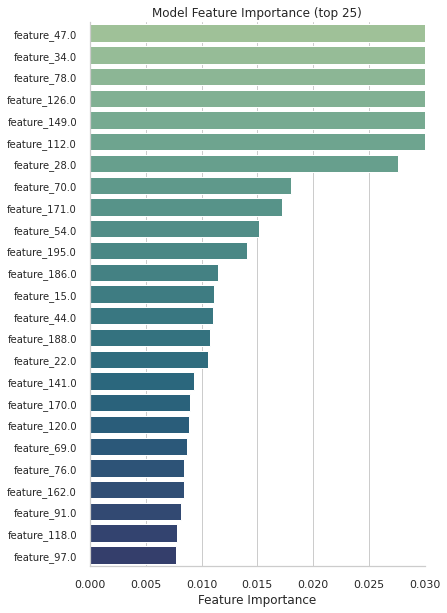

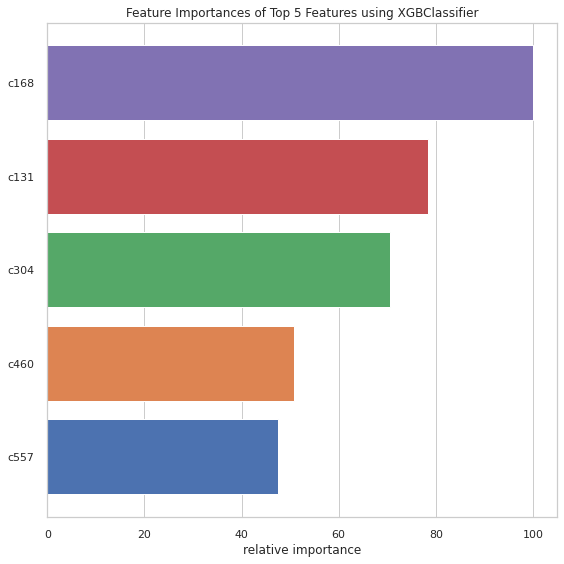

/home/magni/python_env/ML1010_env2/lib64/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


<Figure size 576x576 with 0 Axes>

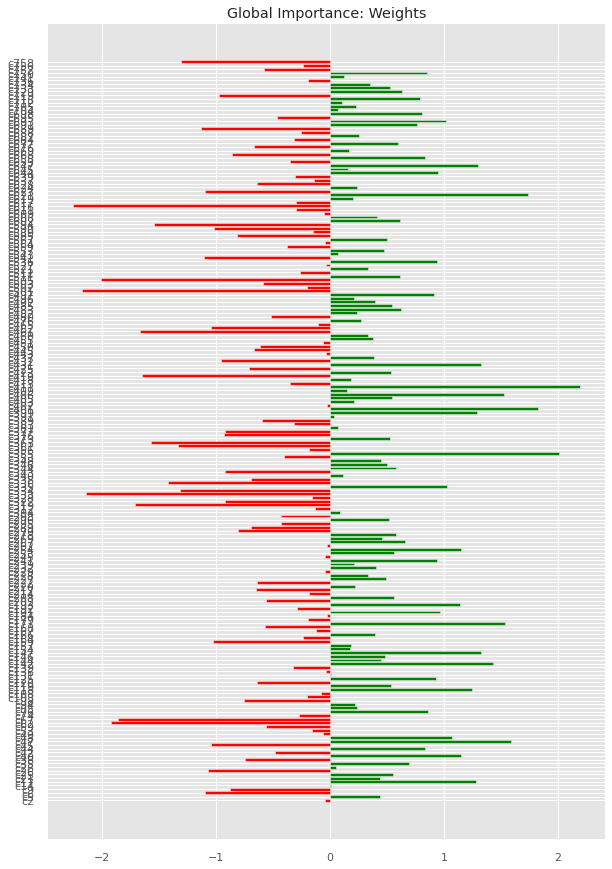

/home/magni/python_env/ML1010_env2/lib64/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/home/magni/python_env/ML1010_env2/lib64/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


predicted [1]
actual 0


/home/magni/python_env/ML1010_env2/lib64/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


<Figure size 576x576 with 0 Axes>

In [15]:
myExp.showFinalModelReport(axis_labels,
                           startValue=0.01,
                           increment=0.001,
                           upperValue=0.02)

In [16]:
myExp.display()

DataExperiment summary:
---> projectName: ML1010-Group-Project
---> experimentName: ReviewText_Lemma_Bert2_Full (XGB_Tune)
---> isDataPackageLoaded: True
---> isBaseModelLoaded: True
---> isBaseModelPredicted: True
---> isBaseModelLearningCurveCreated: True
---> isFinalModelLoaded: True
---> isFinalModelPredicted: True
---> isFinalModelLearningCurveCreated: True
---> isClassifierLoaded: True
XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=0.4,
              enable_categorical=False, eval_metric='mlogloss', gamma=10,
              gpu_id=None, importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_delta_step=None, max_depth=4,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=0.3, reg_lambda=None,
              scale_pos_weig

#  Save Experiment

In [17]:
jarvis.saveExperiment(myExp, FILE_NAME)

#  Scratchpad